# CIRM Special
This notebook is to make an animation to be shown at a conference at CIRM.

['C:\\Users\\mao17\\AppData\\Local\\Programs\\Python\\Python313\\python313.zip', 'C:\\Users\\mao17\\AppData\\Local\\Programs\\Python\\Python313\\DLLs', 'C:\\Users\\mao17\\AppData\\Local\\Programs\\Python\\Python313\\Lib', 'C:\\Users\\mao17\\AppData\\Local\\Programs\\Python\\Python313', 'c:\\Users\\mao17\\Workspace\\pdot\\venv', '', 'c:\\Users\\mao17\\Workspace\\pdot\\venv\\Lib\\site-packages', 'c:\\Users\\mao17\\Workspace\\pdot\\venv\\Lib\\site-packages\\win32', 'c:\\Users\\mao17\\Workspace\\pdot\\venv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\mao17\\Workspace\\pdot\\venv\\Lib\\site-packages\\Pythonwin', '../../../..', '../../..']


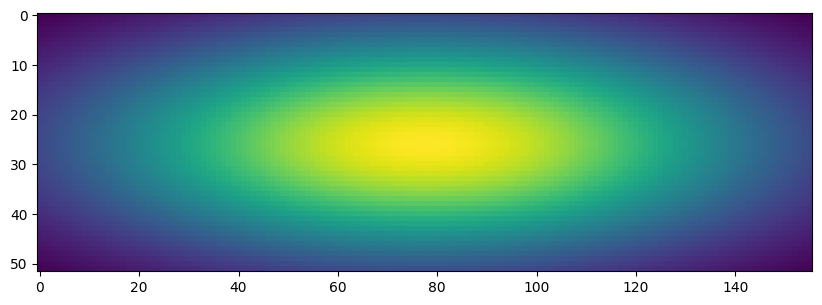

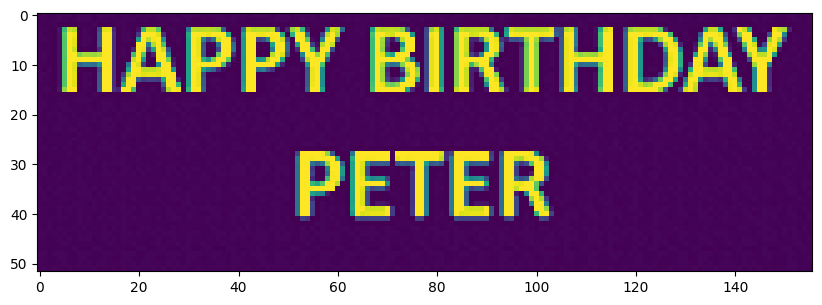

In [2]:
import scipy as sp
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import sys
sys.path.append('../../..')
print(sys.path)
from proximal.dynamicUOT import computeGeodesic

def image_to_numpy(image_path):
    # Load the image file
    image = Image.open(image_path).convert('L')  # Convert image to grayscale if it's not

    # Convert the PIL image to a numpy array
    image_array = np.array(image)

    return image_array

indicesx = np.arange(0, 156) * 1./156
indicesy = np.arange(0, 52) * 1./52
xx, yy = np.meshgrid(indicesx, indicesy)

rho_1 = (1-image_to_numpy('data/input/HAPPY BIRTHDAY PETER.png').squeeze()/255)
rho_0 = sp.stats.multivariate_normal.pdf(np.stack([xx, yy], axis=-1), mean=[78./156., 26./52.], cov=0.1)

rho_0 = rho_0 / np.sum(rho_0)
rho_1 = rho_1 / np.sum(rho_1)

T = 100
N1 = rho_1.shape[0]
N2 = rho_1.shape[1]

# plot rho_0 and rho_1
plt.figure(figsize=(10, 5))
plt.imshow(rho_0)
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(rho_1)
plt.show()

In [3]:
ll = (1.0, 1.0, 3.0)

x, lists = computeGeodesic(rho_0, rho_1, T, ll, p= 2.0, q=2.0, delta=1.0, niter=3000)

Computing a geodesic for optimal transport with source...
Progress: 1%

KeyboardInterrupt: 

In [ ]:
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter
import numpy as np

cmap = plt.cm.Greys

# Assuming plot_elements8, rho_0, rho_1, and T are defined elsewhere

global_min = min(rho_0.min(), rho_1.min(), x.V.D[0].min())
global_max = max(rho_0.max(), rho_1.max(), x.V.D[0].max())

fig, ax = plt.subplots(figsize=(5, 10))

def init():
    if T <= 0:
        im = ax.imshow(rho_0, cmap=cmap, vmin=global_min, vmax=global_max)
    else:
        im = ax.imshow(rho_1, cmap=cmap, vmin=global_min, vmax=global_max)
    ax.axis('off')  # Remove the axis
    return [im]

def update(t):
    ax.clear()
    if t <= 0:
        im = ax.imshow(rho_0, cmap, vmin=global_min, vmax=global_max)
    elif t >= T:
        im = ax.imshow(rho_1, cmap, vmin=global_min, vmax=global_max)
    else:
        im = ax.imshow(x.V.D[0][t], cmap, vmin=global_min, vmax=global_max)
    ax.axis('off')  # Remove the axis
    return [im]

ani = FuncAnimation(fig, update, frames=np.arange(0, T+1), init_func=init, blit=True)

# Save as GIF
ani.save('cirm_special.gif', writer=PillowWriter(fps=10))

# Save as MP4
ani.save('cirm_special.mp4', writer=FFMpegWriter(fps=10))

In [ ]:
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter
import numpy as np

cmap = plt.cm.viridis

# Assuming plot_elements8, rho_0, rho_1, and T are defined elsewhere

global_min = min(rho_0.min(), rho_1.min(), x.V.D[0].min())
global_max = max(rho_0.max(), rho_1.max(), x.V.D[0].max())

fig, ax = plt.subplots(figsize=(5, 10))

def init():
    if T <= 0:
        im = ax.imshow(rho_0, cmap=cmap, vmin=global_min, vmax=global_max)
    else:
        im = ax.imshow(rho_1, cmap=cmap, vmin=global_min, vmax=global_max)
    ax.axis('off')  # Remove the axis
    return [im]

def update(t):
    ax.clear()
    if t <= 0:
        im = ax.imshow(rho_0, cmap, vmin=global_min, vmax=global_max)
    elif t >= T:
        im = ax.imshow(rho_1, cmap, vmin=global_min, vmax=global_max)
    else:
        im = ax.imshow(x.V.D[0][t], cmap, vmin=global_min, vmax=global_max)
    ax.axis('off')  # Remove the axis
    return [im]

ani = FuncAnimation(fig, update, frames=np.arange(0, T+1), init_func=init, blit=True)

# Save as GIF
ani.save('cirm_special_viridis.gif', writer=PillowWriter(fps=10))

# Save as MP4
ani.save('cirm_special_viridis.mp4', writer=FFMpegWriter(fps=10))